# Lesson 28: TensorFlow/Keras neural network demonstration

## Notebook set up
### Imports

In [1]:
# Third party imports
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

2026-01-26 17:19:23.840738: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-26 17:19:24.025381: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-26 17:19:25.105435: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-26 17:19:27.320292: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 1. Data preparation

### 1.1. Load occupancy data

In [7]:
occupancy_df = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit4/occupancy_data.csv')
occupancy_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
occupancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
occupancy_df['Occupancy'].unique()

array([1, 0])

In [9]:
label = 'Occupancy'
features = ['Temperature','Humidity','Light','CO2','HumidityRatio']

### 1.2. Train test split

In [10]:
# TODO: Split the data into training and testing sets
# Use train_test_split with random_state=315
train_df , test_df = train_test_split(occupancy_df, random_state=315)


# train_df → has X + y
# test_df  → has X + y

# You must separate features and label manually when fitting:
# X_train = train_df[features]
# y_train = train_df[label]

# X_test  = test_df[features]
# y_test  = test_df[label]



### 1.3. Standard scale

#### Features

In [11]:
y = train_df[label]
print(y.value_counts(normalize=True)) # normalize: Show the results as percentages instead of counts by setting this to True.

Occupancy
0    0.768612
1    0.231388
Name: proportion, dtype: float64


In [12]:
# TODO: Create a StandardScaler and fit it on the training features
# Then transform both training and testing features
# Hint: Fit only on training data to avoid data leakage

F_scaler = StandardScaler()
F_scaler.fit(train_df[features])

train_df[features] = F_scaler.transform(train_df[features])
test_df[features] = F_scaler.transform(test_df[features])




## 2. Logistic regression baseline

### 2.1. Fit

In [13]:
# TODO: Create and fit a LogisticRegression model
# Use n_jobs=-1 and random_state=315

Logistic = LogisticRegression(n_jobs=-1, random_state=315,   class_weight='balanced')

Logistic.fit(train_df[features], train_df[label])


LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=315)

### 2.2. Test set evaluation

In [14]:
# TODO: Make predictions on the test set and calculate accuracy
# Print the accuracy formatted to 4 decimal places
logistic_predict = Logistic.predict(test_df[features])

accuracy = accuracy_score(test_df[label], logistic_predict)

print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9897


In [15]:
# Predict probabilities on TEST FEATURES
y_proba = Logistic.predict_proba(test_df[features])[:, 1]
roc_auc = roc_auc_score(test_df[label], y_proba )
f1 = f1_score(test_df[label], logistic_predict)
recall = recall_score(test_df[label], logistic_predict)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9897
F1-score: 0.9780
Recall: 0.9975
ROC-AUC: 0.9943


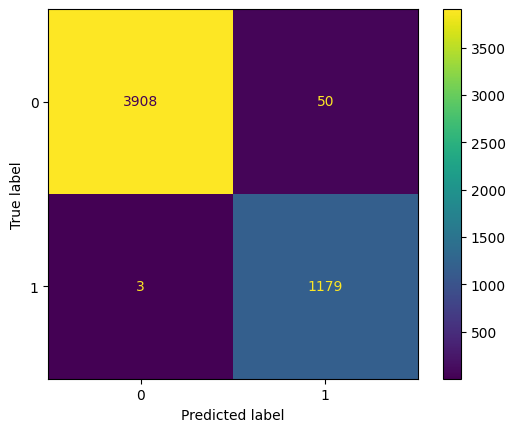

In [16]:
confusing = confusion_matrix(test_df[label],logistic_predict )

disp = ConfusionMatrixDisplay(confusion_matrix=confusing,
                       display_labels=Logistic.classes_)

disp.plot()
plt.show()


## 3. Keras Sequential API model

The Sequential API is the simplest way to build a neural network in Keras. It allows you to create models layer-by-layer in a linear stack.

### 3.1. Build model

In [ ]:
# TODO: Set the random seed for reproducibility
tf.random.set_seed(315)

# TODO: Create a Sequential model with:
# - Input layer with shape (5,) for 5 features
# - Dense layer with 64 units and 'relu' activation
# - Dense layer with 32 units and 'relu' activation  
# - Dense output layer with 1 unit and 'sigmoid' activation (for binary classification)

sequantial_model = keras.Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# TODO: Compile the model with:
# - Adam optimizer with learning_rate=0.001
# - 'binary_crossentropy' loss function
# - 'accuracy' metric
# learning_rate=0.001 = step size for weight updates
# too high → unstable
# too low → slow learning

sequantial_model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001), # Controls how the model updates its weights to minimize the loss.
    loss ='binary_crossentropy', # Defines what error the model is trying to minimize, 
    metrics =['accuracy']  # Specifies what performance metric to report during training
)

# TODO: Display the model summary
sequantial_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

### 3.2. Train model

In [ ]:
# TODO: Train the model using .fit() with:
# - Training features and labels
# - epochs=75
# - batch_size=64
# - validation_split=0.2
# - verbose=1
sequential_history = sequantial_model.fit(
    train_df[features],
    train_df[label],
    epochs = 75,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1
    
    )

# TODO: Print the final training and validation loss and accuracy
# Access the history using: history.history['loss'], history.history['val_loss'], etc.
print('Training complete.')
print(f"Final traiining loss :{sequential_history.history['loss'][-1]:.4f}")
print(f"Final traiining val_loss :{sequential_history.history['val_loss'][-1]:.4f}")

Epoch 1/75
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9561 - loss: 0.1834 - val_accuracy: 0.9896 - val_loss: 0.0461
Epoch 2/75
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0521 - val_accuracy: 0.9893 - val_loss: 0.0408
Epoch 3/75
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0489 - val_accuracy: 0.9896 - val_loss: 0.0398
Epoch 4/75
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0472 - val_accuracy: 0.9896 - val_loss: 0.0394
Epoch 5/75
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9876 - loss: 0.0459 - val_accuracy: 0.9899 - val_loss: 0.0392
Epoch 6/75
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0449 - val_accuracy: 0.9899 - val_loss: 0.0391
Epoch 7/75
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0442 - val_accuracy: 0.9899 - val_loss: 0.0389
Epoch 8/75
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0435 - val_accuracy: 0.

### 3.3. Learning curves

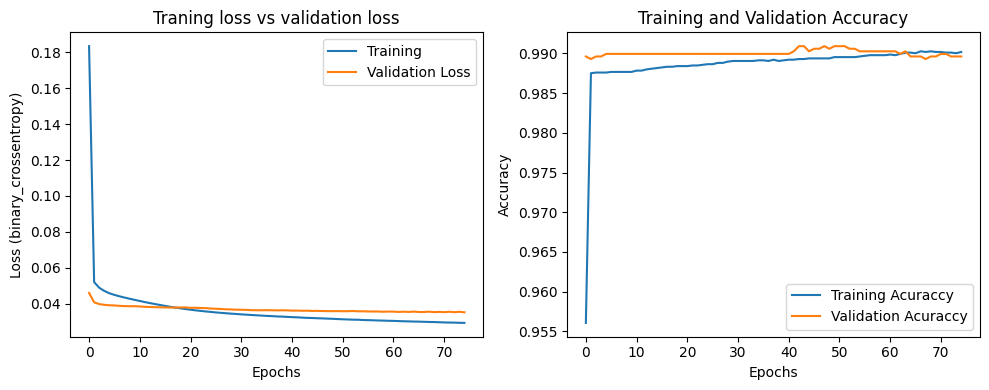

In [19]:
# TODO: Plot the learning curves (loss and accuracy over epochs)
# Create a figure with 2 subplots side by side
# Left plot: training and validation loss
# Right plot: training and validation accuracy
# Include proper titles, labels, and legends

fig , axes = plt.subplots(1,2 , figsize=(10,4))

axes[0].set_title('Traning loss vs validation loss')
axes[0].plot(sequential_history.history['loss'], label='Training')
axes[0].plot(sequential_history.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss (binary_crossentropy)')
axes[0].legend(loc='best')

axes[1].set_title('Training and Validation Accuracy')
axes[1].plot(sequential_history.history['accuracy'], label='Training Acuraccy')
axes[1].plot(sequential_history.history['val_accuracy'], label='Validation Acuraccy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

### 3.4. Test set evaluation

In [27]:
# # TODO: Get predictions from the Sequential model on the test set
# # - Use .predict() to get probabilities
# # - Convert probabilities to class predictions using threshold of 0.5
# # - Calculate and print the accuracy

# - Convert probabilities to class predictions using threshold of 0.5 
# Because your output layer is: --> Dense(1, activation='sigmoid')--> model.predict(X_test) returns probabilities, not classes.
# Exam Output --> y_prob = [0.12, 0.87, 0.49, 0.73]
# With threshold = 0.5:
# if probability ≥ 0.5 → class 1
# if probability < 0.5 → class 0
# # | Probability | Class |
# # | ----------- | ----- |
# # | 0.12        | 0     |
# # | 0.87        | 1     |
# # | 0.49        | 0     |
# # | 0.73        | 1     |


treshold = 0.5
sequnatial_predict = sequantial_model.predict(test_df[features] ).flatten()
y_pred = (sequnatial_predict >= treshold).astype(int)
print(y_pred)
acurracy = accuracy_score(test_df[label], y_pred)
print(f"Accuracy score : {acurracy:.4f}")

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[0 0 0 ... 0 0 1]
Accuracy score : 0.9916


### 3.5. Performance analysis

[]

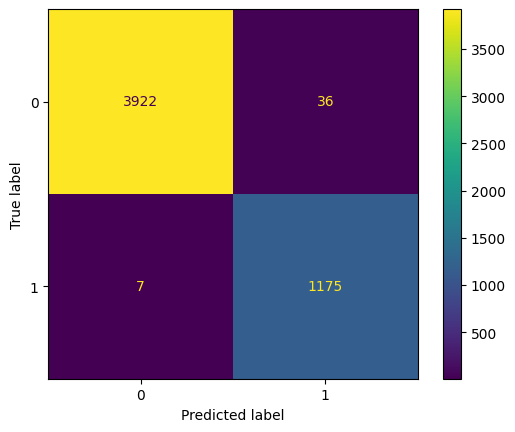

In [35]:
# TODO: Create a confusion matrix visualization
# Use ConfusionMatrixDisplay.from_predictions()
# Include the accuracy in the title

confusing = ConfusionMatrixDisplay.from_predictions(test_df[label],y_pred  )
plt.plot()


## 4. Model comparison

In [36]:
# TODO: Print the accuracy of both models for comparison

acurracy = accuracy_score(test_df[label], y_pred)
print(f"Accuracy score for sequantial_model: {acurracy:.4f}")

roc_auc = roc_auc_score(test_df[label], y_proba )
print(f"Accuracy for LogisticRegresion : {accuracy:.4f}")

Accuracy score for sequantial_model: 0.9916
Accuracy for LogisticRegresion : 0.9897


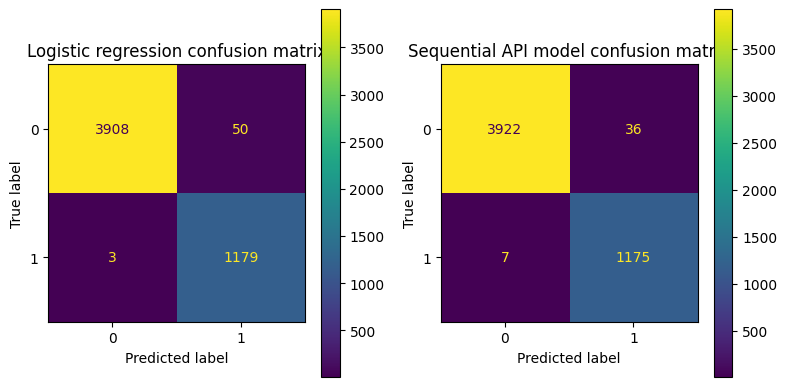

In [44]:
# TODO: Create side-by-side confusion matrix comparison
# Create a figure with 2 subplots
# Left: Logistic regression confusion matrix
# Right: Sequential API model confusion matrix
# Include accuracy in the titles

fig , axes = plt.subplots(1,2 ,figsize=(8,4))

axes[0].set_title('Logistic regression confusion matrix')
ConfusionMatrixDisplay.from_predictions(test_df[label],
                                         logistic_predict, 
                                         ax=axes[0])


axes[1].set_title('Sequential API model confusion matrix')
ConfusionMatrixDisplay.from_predictions(test_df[label],
                                                y_pred,
                                                ax=axes[1])

plt.tight_layout()
plt.show()